<a href="https://colab.research.google.com/github/ayush2281/TrafficPrediction_Proj/blob/main/TrafficPredictionProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-1(Assign by Ayush)

Importing Dependencies

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

Step-2(Assign by Ayush)

Dats Collection  and analysis

In [41]:
traffic_dataset = pd.read_csv('Traffic.csv')

In [42]:
# Printing 1st Five Rows
traffic_dataset.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [43]:
#Printing last five rows
traffic_dataset.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
2975,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [6]:
#printing the Rows and Column of dataset
traffic_dataset.shape

(2976, 9)

In [7]:
# printing the some information about dataset
traffic_dataset.info

<bound method DataFrame.info of              Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0     12:00:00 AM    10         Tuesday        31          0         4   
1     12:15:00 AM    10         Tuesday        49          0         3   
2     12:30:00 AM    10         Tuesday        46          0         3   
3     12:45:00 AM    10         Tuesday        51          0         2   
4      1:00:00 AM    10         Tuesday        57          6        15   
...           ...   ...             ...       ...        ...       ...   
2971  10:45:00 PM     9        Thursday        16          3         1   
2972  11:00:00 PM     9        Thursday        11          0         1   
2973  11:15:00 PM     9        Thursday        15          4         1   
2974  11:30:00 PM     9        Thursday        16          5         0   
2975  11:45:00 PM     9        Thursday        14          3         1   

      TruckCount  Total Traffic Situation  
0              4     39            

In [9]:
# Checking the missing value
traffic_dataset.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

No null values

In [10]:
traffic_dataset.value_counts()

Time         Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  Traffic Situation
10:00:00 AM  1     Wednesday        97        2          16        7           122    normal               1
6:00:00 AM   4     Saturday         102       21         42        3           168    heavy                1
5:45:00 PM   26    Thursday         132       37         23        10          202    heavy                1
             27    Friday           76        30         20        1           127    normal               1
             28    Saturday         114       32         45        6           197    heavy                1
                                                                                                          ..
2:00:00 AM   3     Friday           11        5          1         11          28     low                  1
             4     Saturday         14        0          1         12          27     low                  1
             5     Sunda

Data Analysis

In [11]:
# getting some statistical information about the dataset
# basically we are getting the numerical values in dataset
traffic_dataset.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [12]:
# finding the traffic sitution
traffic_dataset["Traffic Situation"].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [15]:
# getting value of bike
traffic_dataset['BikeCount'].value_counts()

BikeCount
5     211
4     165
1     156
0     145
2     137
     ... 
58      2
66      1
41      1
42      1
57      1
Name: count, Length: 71, dtype: int64

In [16]:
# getting value of car
traffic_dataset['CarCount'].value_counts()

CarCount
18     110
19      83
15      81
20      75
14      73
      ... 
167      1
154      1
152      1
155      1
163      1
Name: count, Length: 172, dtype: int64

In [17]:
# getting value of bus
traffic_dataset['BusCount'].value_counts()

BusCount
0     437
1     389
10    105
15     81
11     78
12     78
20     77
6      75
14     74
5      69
13     69
7      68
3      60
16     59
4      57
22     54
23     49
8      49
18     48
9      46
31     46
27     46
25     43
37     42
21     42
28     41
39     40
17     39
29     38
19     37
32     37
26     35
36     31
40     30
24     30
34     30
30     30
38     29
48     27
33     26
35     25
2      25
41     24
50     23
42     22
46     22
49     21
43     20
44     19
45     18
47     16
Name: count, dtype: int64

Data Visualisation

In [19]:
sns.set()

<Axes: xlabel='Traffic Situation', ylabel='count'>

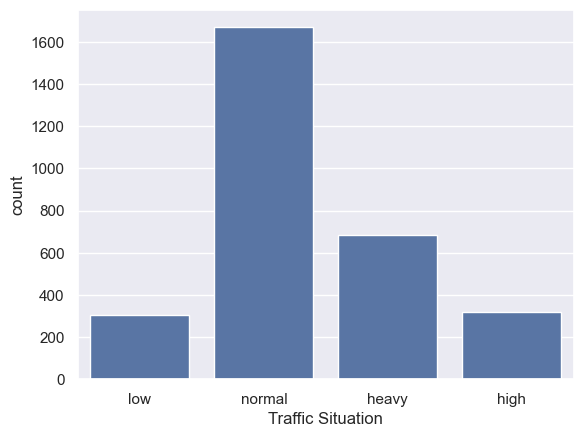

In [45]:
# making the count plot for "Weather situation" column
sns.countplot(x='Traffic Situation', data=traffic_dataset)

In [44]:
# number of surviovors gender wise
sns.countplot(x = 'Day of the week',  hue='Traffic Sitaution', data=traffic_dataset)

ValueError: Could not interpret value `Traffic Sitaution` for `hue`. An entry with this name does not appear in `data`.